In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from string import ascii_letters

In [2]:
norm_df = pd.read_csv('NormDF', index_col=0)
norm_df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C3',C5',P(mid),C6',T4',T3',T5',S1',S2',S3'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,-0.046771,-0.044253,-0.047690,-0.011825,-0.012687,0.136364,0.000373,...,0.470674,-0.007648,-0.046532,0.058284,2.319193,-4.777428,-1.344321,26.301985,4.233464,8.525938
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,-0.071161,-0.040549,-0.052452,-0.015810,0.053274,-0.863636,-0.000713,...,-0.529326,0.074404,-0.046532,-0.052827,1.013598,1.011810,0.232908,0.045382,0.716494,0.584531
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,-0.083356,-0.010920,-0.014357,-0.016285,-0.028094,0.136364,-0.000631,...,-0.529326,-0.012624,-0.012634,-0.052827,0.961331,0.984255,0.225504,0.156420,0.616749,0.647162
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,-0.028478,0.003895,0.004691,-0.011376,0.029201,0.136364,-0.000560,...,-0.529326,-0.013322,0.004315,-0.052827,1.304008,0.948006,0.180516,-0.407732,0.720790,0.442089
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,0.087376,0.040932,0.052310,0.026762,-0.032908,0.136364,-0.000349,...,0.470674,-0.009035,0.046688,-0.002827,0.598923,0.959197,0.094104,-0.107594,0.740994,0.614735


In [3]:
#Calculate correlation with .corr(): 
print(norm_df.corr(method = 'spearman'))

           P(IPO)      P(H)      P(L)   P(1Day)        C1        C2        C3  \
P(IPO)   1.000000  0.803705  0.805593  0.647840 -0.068953  0.268853  0.175611   
P(H)     0.803705  1.000000  0.996178  0.444217 -0.065231  0.280728  0.141659   
P(L)     0.805593  0.996178  1.000000  0.447109 -0.062057  0.291564  0.145824   
P(1Day)  0.647840  0.444217  0.447109  1.000000 -0.035852  0.234564  0.045517   
C1      -0.068953 -0.065231 -0.062057 -0.035852  1.000000 -0.000488  0.046093   
C2       0.268853  0.280728  0.291564  0.234564 -0.000488  1.000000  0.015888   
C3       0.175611  0.141659  0.145824  0.045517  0.046093  0.015888  1.000000   
C4      -0.004493 -0.041148 -0.045253  0.002386  0.091500 -0.031415  0.014531   
C5       0.358363  0.375942  0.380110  0.216681  0.050327  0.432822  0.133456   
C6       0.396868  0.448986  0.455252  0.194187  0.002105  0.401304  0.167353   
C7       0.407719  0.496943  0.499369  0.159160  0.069115  0.210420  0.341290   
T1       0.274026  0.295533 

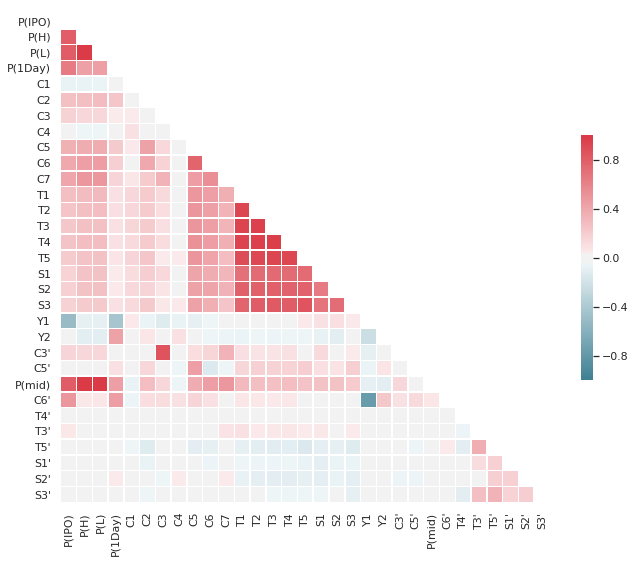

In [4]:
# Compute the correlation matrix
corr = norm_df.corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Draw the heatmap with the mask and aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [5]:
#Sort out the top correlation values using Spearman method 
def correl(norm_df):
    cor = norm_df.corr(method = 'spearman')
    corrm = np.corrcoef(norm_df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    
    ##Print max and min correlation values 
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    
    ## Drop duplicates, sort values in decending order, and include all values not equal to 1
    cor2 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = cor2[cor2.values!=1]
    
     ## Display threshold above 0.5 for highly correlated results       
    threshold = 0.5
    display(high_cor[high_cor>threshold])
correl(corr)

max corr: 0.9999840972291217 , min corr:  -0.971027281588594


T3       T4         0.998790
P(L)     P(mid)     0.998387
T3       T2         0.997984
P(H)     P(L)       0.996774
T4       T2         0.996371
         T1         0.995968
T3       T1         0.995161
T2       T1         0.993145
S3       T5         0.989919
T3       T5         0.985484
T5       T2         0.983871
T4       T5         0.981855
T5       S2         0.979032
T3       S3         0.978226
T2       S3         0.976613
T5       T1         0.976210
S1       T3         0.973387
T3       S2         0.972581
S2       T2         0.971371
T2       S1         0.970565
S1       T4         0.970161
         T1         0.969355
T5       S1         0.968952
S2       T1         0.967339
         T4         0.966129
S3       S2         0.962903
S1       S2         0.961290
S3       S1         0.958871
P(IPO)   P(L)       0.935887
         P(H)       0.935081
                      ...   
C1       S1         0.578629
C5'      S3         0.575000
T4       C5'        0.565726
C1       T3   

In [6]:
#Sort out the low correlation values using Spearman method 
def correl(norm_df):
    cor = norm_df.corr(method = 'spearman')
    corrm = np.corrcoef(norm_df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    
    ##Print max and min correlation values 
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    
    ## Drop duplicates, sort values in decending order, and include all values not equal to -1
    cor2 = cor.stack().sort_values(ascending=False).drop_duplicates()
    low_cor = cor2[cor2.values!=-1]
    
    
   ## Display threshold below -0.5 for highly correlated results         
    threshold = -0.5
    display(low_cor[low_cor<threshold])
correl(corr)

max corr: 0.9999840972291217 , min corr:  -0.971027281588594


S3'      T4'   -0.503226
C6       Y2    -0.522581
C2       S3'   -0.523387
T5'      C1    -0.528629
C7       Y2    -0.543145
T5'      C6    -0.553226
C5       S3'   -0.556452
T4'      T5'   -0.560081
C2       S1'   -0.560484
S2'      T4'   -0.562097
Y2       T2    -0.566935
         Y1    -0.574194
T4       Y2    -0.575806
Y2       T3    -0.579435
P(1Day)  Y1    -0.584274
S2       S3'   -0.585081
Y2       T1    -0.589516
S1'      C6    -0.589919
C1       S1'   -0.592742
T2       S3'   -0.598790
S3'      T3    -0.604839
T5       Y2    -0.608065
T4       S3'   -0.610081
T1       S3'   -0.610887
S2'      C5'   -0.619758
T5'      C2    -0.627823
C5'      T5'   -0.628629
T5       S3'   -0.632661
S1       Y2    -0.633871
S3       S3'   -0.650000
C5       S1'   -0.663710
S2       Y2    -0.670565
S1       S3'   -0.671774
C1       S2'   -0.672984
S2'      C5    -0.695161
S2       S2'   -0.728629
S2'      T5    -0.747581
S3       S2'   -0.760887
S2'      T3    -0.765726
T4       S2'   -0.766532
